In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
runcycle=1000
runduration=0.10 
timestep=runduration/runcycle;


In [9]:
# input parameters

L= 50000#in uH
C= 650#in uF
n= 1000 # winding count
Rcoil= 15 # in ohms
Rpara= 1 
R=Rcoil+Rpara

a=R/(2*L*10**-6)
w=1/np.sqrt(L*10**-6*C*10**-6)

V0=15 # in Volts
I0=0

B1=I0
B2=V0/(L*10**-6)/w

C1=V0
C2=0

coil_length=10 #mm
coil_radius=5 #mm
caliber = 25 #mm^2(5mm by 5mm)
load_length=3 #mm
load_mass=15 # grams
u0=4*np.pi*10**-7 #vacuum permeability
u=6.3*10**-3 #iron permeability (H/m)
saturation=0.75 #Teslas
D=1 #mm starting offset

In [11]:
# setup time series
Icyc=np.zeros(runcycle)
Idis=np.zeros(runcycle)
Iflywheel=np.zeros(runcycle)
Vcyc=np.zeros(runcycle)

t=np.linspace(0,runduration,runcycle)

In [12]:
# raw current response
Icyc = B1*np.exp(-a*t)*np.cos(w*t)+B2*np.exp(-a*t)*np.sin(w*t)
#diode clamped state
Idis = max(Icyc)*np.exp((-R*t)/(L*10**-6))


In [19]:
# generate diode flywheel response
insersionPt=0
captured=0
for i in range(runcycle-1):
    if (Icyc[i]>Icyc[i+1] and captured ==0):
        insersionPt=i
        captured=1
Iflywheel=Icyc
Iflywheel[insersionPt:runcycle]=Idis[0:runcycle-insersionPt]

In [28]:
#calculate saturation flux & force
maxforce = saturation**2*caliber*10**-6/2/u0


In [29]:
#generate force, acceleration, veolocity, displacement time series
force=np.zeros(runcycle);
force_raw=np.zeros(runcycle);
dis=np.zeros(runcycle);
v=np.zeros(runcycle);
a=np.zeros(runcycle);

In [34]:
#simulate force transient
iterr = iter(range(runcycle))
next(iterr) # skip first term
for i in iterr:
    if dis[i-1]*1000<D:
        force[i]=(n*Iflywheel[i])**2*u0*caliber*10**-6/2/((D*10**-3-dis[i-1]))**2
        print('before %.4f %.4f %d',dis[i-1],force[i],i)
    elif (D-dis[i-1]*1000 <= 0 and dis[i-1]*1000-D <= coil_length ): # if in coil
        force[i]=(.5-((dis[i-1]*10**3-D)/coil_length))*2* (u*n*Iflywheel[i])**2*caliber*10**-6/2/u0
        print('within %.4f %.4f %d',dis[i-1],.5-((dis[i-1]*10**3-D)/coil_length),i)
    elif dis[i-1]*1000-D-coil_length>0:
        force[i]=-(n*Iflywheel[i])**2*u0*caliber*10**-6/2/((dis[i-1]-D*10**-3-coil_length*10**-3))**2
        print('beyond %.4f %.4f %d',dis[i-1],force[i],i)
    
    force_raw[i]=force[i];
    if force[i]>0:
        force[i] = min(force[i],maxforce);
    else:
        force[i] = -min(-force[i],maxforce);
    
    a[i]=force[i]/(load_mass*10**-3);
    v[i]=v[i-1]+a[i]*timestep;
    dis[i]=dis[i-1]+v[i]*timestep;


before %.4f %.4f %d 0.0 0.013717514961887953 1
before %.4f %.4f %d 9.14500997459197e-09 0.053124901620683666 2
before %.4f %.4f %d 5.370662102963973e-08 0.11571371531770094 3
before %.4f %.4f %d 1.754107089631548e-07 0.19913343875414283 4
before %.4f %.4f %d 4.298704227327651e-07 0.30121189126991693 5
before %.4f %.4f %d 8.851380640156534e-07 0.4199791287001142 6
before %.4f %.4f %d 1.6203917910986179e-06 0.553692524971556 7
before %.4f %.4f %d 2.7247738681626195e-06 0.7008616552270549 8
before %.4f %.4f %d 4.296397048711324e-06 0.8602724855591098 9
before %.4f %.4f %d 6.441535219632769e-06 1.0310112087051198 10
before %.4f %.4f %d 9.274014196357627e-06 1.2124888581468285 11
before %.4f %.4f %d 1.2914819078513704e-05 1.404468619244797 12
before %.4f %.4f %d 1.7491936373499645e-05 1.6070986003876453 13
before %.4f %.4f %d 2.3140452735410683e-05 1.820953834471419 14
before %.4f %.4f %d 3.0002938320302667e-05 2.047092611985768 15
before %.4f %.4f %d 3.823015231318517e-05 2.287134147961274

beyond %.4f %.4f %d 0.060155613234654536 -6.824672232101151e-18 568
beyond %.4f %.4f %d 0.060261513575426764 -6.3736742385661384e-18 569
beyond %.4f %.4f %d 0.06036741391619899 -5.952534774156296e-18 570
beyond %.4f %.4f %d 0.06047331425697122 -5.559273193343975e-18 571
beyond %.4f %.4f %d 0.06057921459774345 -5.1920405053288926e-18 572
beyond %.4f %.4f %d 0.06068511493851568 -4.84911060387158e-18 573
beyond %.4f %.4f %d 0.06079101527928791 -4.5288720826914096e-18 574
beyond %.4f %.4f %d 0.06089691562006014 -4.229820597238133e-18 575
beyond %.4f %.4f %d 0.06100281596083237 -3.950551736274184e-18 576
beyond %.4f %.4f %d 0.061108716301604596 -3.689754369159076e-18 577
beyond %.4f %.4f %d 0.061214616642376825 -3.4462044370141933e-18 578
beyond %.4f %.4f %d 0.061320516983149054 -3.218759158081364e-18 579
beyond %.4f %.4f %d 0.06142641732392128 -3.0063516195781178e-18 580
beyond %.4f %.4f %d 0.06153231766469351 -2.8079857302098607e-18 581
beyond %.4f %.4f %d 0.06163821800546574 -2.622731509

In [36]:
#calculate efficiency
outenergy=0.5*(load_mass*10**-3)*v[-1]**2;
inenergy=0.5*(C*10**-6)*V0**2;
effi=100*outenergy/inenergy
print(effi)

11.502443257101557


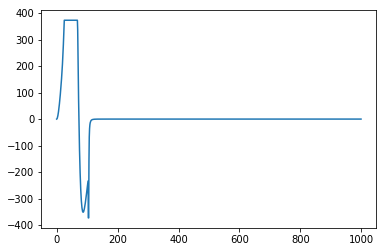

In [39]:
plt.plot(a)

In [40]:
force

array([ 0.00000000e+00,  1.37175150e-02,  5.31249016e-02,  1.15713715e-01,
        1.99133439e-01,  3.01211891e-01,  4.19979129e-01,  5.53692525e-01,
        7.00861655e-01,  8.60272486e-01,  1.03101121e+00,  1.21248886e+00,
        1.40446862e+00,  1.60709860e+00,  1.82095383e+00,  2.04709261e+00,
        2.28713415e+00,  2.54336744e+00,  2.81890565e+00,  3.11790734e+00,
        3.44589772e+00,  3.81024226e+00,  4.22085906e+00,  4.69131636e+00,
        5.24057416e+00,  5.59529097e+00,  5.59529097e+00,  5.59529097e+00,
        5.59529097e+00,  5.59529097e+00,  5.59529097e+00,  5.59529097e+00,
        5.59529097e+00,  5.59529097e+00,  5.59529097e+00,  5.59529097e+00,
        5.59529097e+00,  5.59529097e+00,  5.59529097e+00,  5.59529097e+00,
        5.59529097e+00,  5.59529097e+00,  5.59529097e+00,  5.59529097e+00,
        5.59529097e+00,  5.59529097e+00,  5.59529097e+00,  5.59529097e+00,
        5.59529097e+00,  5.59529097e+00,  5.59529097e+00,  5.59529097e+00,
        5.59529097e+00,  